In [15]:
import sys; sys.path.append('../')
import matplotlib.pyplot as plt
from utils import *

In [16]:
# use latex for rendering in matplotlib, use serif font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [28]:
# specify the pitch angles to iterate over
pitch_angles = np.linspace(-11,20,100)

In [29]:
# specify other constant angles
laser_azimuth = 110
laser_polar = 165
mirror_roll = 0
mirror_yaw = 0

In [30]:
# specify properties of the intersection plane
intersection_plane_roll = -30
intersection_plane_yaw = 0
intersection_plane_pitch = 0
intersection_plane_normal = calculate_plane_normal(intersection_plane_roll, intersection_plane_pitch, intersection_plane_yaw)
intersection_plane_point = np.array([10,50,150])

In [31]:
# define the incident vector
incident_vector = calculate_incident_vector(laser_azimuth, laser_polar)

In [32]:
# initialize the arrays to store the results
x = np.zeros(len(pitch_angles))
y = np.zeros(len(pitch_angles))
z = np.zeros(len(pitch_angles))

In [33]:
# loop over the pitch angles
for i, pitch in enumerate(pitch_angles):
    # calculate the plane normal
    plane_normal = calculate_plane_normal(mirror_roll, pitch, mirror_yaw)

    # calculate the reflected vector
    reflected_vector = calculate_reflected_vector(incident_vector, plane_normal)

    # calculate the intersection point
    intersection_point = compute_intersection(intersection_plane_point, intersection_plane_normal, np.array([0,0,0]), reflected_vector)

    # store the results
    x[i] = intersection_point[0]
    y[i] = intersection_point[1]
    z[i] = intersection_point[2]

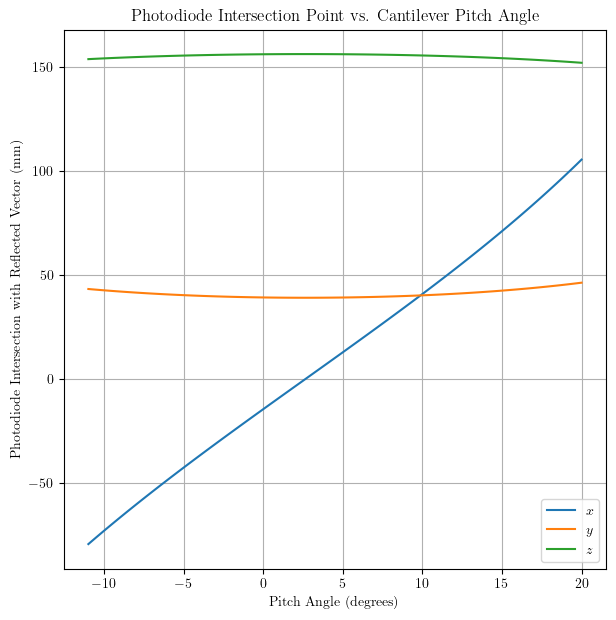

In [34]:
# plot the lines together in matplotlib on the same 2D plot
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(pitch_angles, x, label=r'$x$')
ax.plot(pitch_angles, y, label=r'$y$')
ax.plot(pitch_angles, z, label=r'$z$')
ax.set_xlabel('Pitch Angle (degrees)')
ax.set_ylabel('Photodiode Intersection with Reflected Vector (mm)')
ax.set_title('Photodiode Intersection Point vs. Cantilever Pitch Angle')
ax.legend()
ax.grid()
plt.show()

In [35]:
# initialize delta x, y, and z arrays
dx = np.zeros(len(x))
dy = np.zeros(len(y))
dz = np.zeros(len(z))

In [36]:
# iterate over the pitch angles
for i in range(len(pitch_angles)):
    # calculate the delta x, y, and z
    dx[i] = x[i] - x[0]
    dy[i] = y[i] - y[0]
    dz[i] = z[i] - z[0]

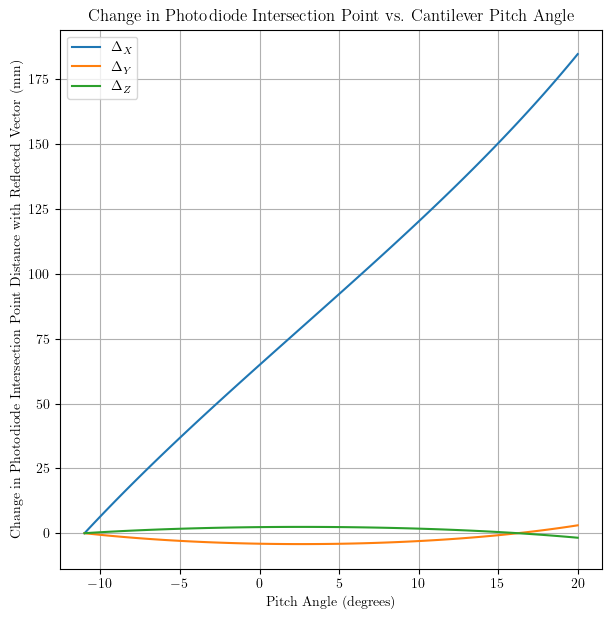

In [40]:
# plot the lines together in matplotlib on the same 2D plot
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(pitch_angles, dx, label=r'$\Delta_X$')
ax.plot(pitch_angles, dy, label=r'$\Delta_Y$')
ax.plot(pitch_angles, dz, label=r'$\Delta_Z$')
ax.set_xlabel('Pitch Angle (degrees)')
ax.set_ylabel('Change in Photodiode Intersection Point Distance with Reflected Vector (mm)')
ax.set_title('Change in Photodiode Intersection Point vs. Cantilever Pitch Angle')
ax.legend()
ax.grid()
plt.show()

In [38]:
64/4

16.0

In [39]:
0.6/0.08

7.5